### Run the following code to import any libraries or packages required to run the rest of the script.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os as os

### Run the following chunk of code to generate adhesion time probability plots.

The user will need to adjust the base_Directory variable, and pay careful attention to the directory structure of the rest of the script.

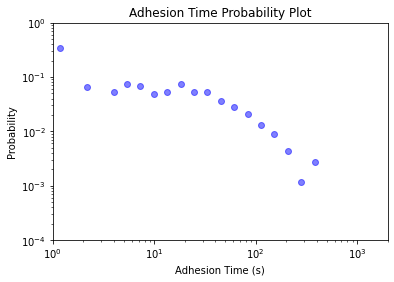

In [2]:
base_Directory = ""

dynamic_Data = pd.read_csv(base_Directory + "Analysis/Video_Data/Dynamics_Data.csv")

seconds_Per_Frame = 1.2
attached_Frames = (dynamic_Data["Frame Detached"] - dynamic_Data["Frame Attached"]) + 1
attached_Times = attached_Frames*seconds_Per_Frame

number_Of_Bins = 25
time_Bin_Spacing_Log = (np.log10(2000) - np.log10(1))/(number_Of_Bins)
time_Bins_Log = np.arange(np.log10(1),np.log10(2000) + time_Bin_Spacing_Log,time_Bin_Spacing_Log)
probability_Weights_Time = np.ones_like(attached_Times) / len(attached_Times)

fig, ax = plt.subplots()

N, bins, patches = ax.hist(attached_Times,facecolor = "none", edgecolor = "none", bins = 10**time_Bins_Log, weights = probability_Weights_Time)
bin_Centers = (bins[:-1] + bins[1:]) / 2
zero_Indices = [i for i, e in enumerate(N) if e == 0]
new_bin_Centers = np.delete(bin_Centers,zero_Indices)
new_N = np.delete(N,zero_Indices)
plt.ylabel("Probability")
plt.xlabel("Adhesion Time (s)")
plt.title("Adhesion Time Probability Plot")
plt.scatter(new_bin_Centers,new_N, facecolor = "blue", edgecolor = "blue", alpha = 0.5)
plt.ylim(10**-4,10**0)
plt.xlim(1,2000)
x_Values = np.linspace(1,1001,1001)
plt.yscale("log")
plt.xscale("log")
plt.savefig(base_Directory + "Analysis/Outputs/Adhesion_Time_Probability_Plot.png")
plt.savefig(base_Directory + "Analysis/Outputs/Adhesion_Time_Probability_Plot.svg")
plt.show()